    
<span style="font-size: 150%;color:WHITE; background:BLACK">wersja 1.0 </span>     
    
<span style="font-size: 180%;color:#1155cc"> Klasyfikacja wersja 1.0 [Stroke_Prediction.csv]
    
<span style="font-size: 180%;color:RED"> CAŁA MASZYNA NIE MOŻE DŁUŻEJ SIĘ WYLICZAĆ NIŻ 30 MINUT   

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from sklearn.ensemble import BaggingClassifier
from simple_colors import * 
from prettytable import PrettyTable

warnings.filterwarnings("ignore")

%matplotlib inline

df= pd.read_csv('/media/wojciech/D6DE33C1DE339927/1A/Stroke_Prediction.csv')
print(df.shape)
print()
print(df.columns)
df.head(3)

(43400, 12)

Index(['ID', 'Gender', 'Age_In_Days', 'Hypertension', 'Heart_Disease',
       'Ever_Married', 'Type_Of_Work', 'Residence', 'Avg_Glucose', 'BMI',
       'Smoking_Status', 'Stroke'],
      dtype='object')


,ID,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Stroke
0,31153,Male,1104.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30650,Male,21204.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,17412,Female,2928.0,0,0,No,Private,Urban,110.89,17.6,NaN,0


## <div class="alert-warning"> Uruchomić gdy model LGBM będzie się burzył!

In [3]:
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

## <div class="alert-success">Sample reduction:</div>

In [4]:
df = df.sample(frac = 0.1, random_state=148) 
df.shape

(4340, 12)

#### Start pomiaru czasu

In [5]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())

Sun Nov 15 22:16:03 2020


### Tool for automatic coding of discrete variables !

In [6]:
a,b = df.shape     #<- ile mamy kolumn
b

print('DISCRETE FUNCTIONS CODED')
print('------------------------')
for i in range(1,b):
    i = df.columns[i]
    f = df[i].dtypes
    if f == np.object:
        print(i,"---",f)   
    
        if f == np.object:
        
            df[i] = pd.Categorical(df[i]).codes
        
            continue

DISCRETE FUNCTIONS CODED
------------------------
Gender --- object
Ever_Married --- object
Type_Of_Work --- object
Residence --- object
Smoking_Status --- object


In [7]:
df.fillna(7777, inplace=True)

## <div class="alert-success"> Ustawienie wartości wynikowej

In [8]:
target = 'Stroke'

In [9]:
X = df.drop(target, axis=1) 
y = df[target]  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123,stratify=y)

<span style="font-size: 180%;color:#1155cc">Oversampling !! 

In [10]:
def oversampling(ytrain, Xtrain):
    import matplotlib.pyplot as plt
    
    global Xtrain_OV
    global ytrain_OV

    calss1 = np.round((sum(ytrain == 1)/(sum(ytrain == 0)+sum(ytrain == 1))),decimals=2)*100
    calss0 = np.round((sum(ytrain == 0)/(sum(ytrain == 0)+sum(ytrain == 1))),decimals=2)*100
    
    print("y = 0: ", sum(ytrain == 0),'-------',calss0,'%')
    print("y = 1: ", sum(ytrain == 1),'-------',calss1,'%')
    print('--------------------------------------------------------')
    
    ytrain.value_counts(dropna = False, normalize=True).plot(kind='pie',title='Before oversampling')
    plt.show
    print()
    
    Proporcja = sum(ytrain == 0) / sum(ytrain == 1)
    Proporcja = np.round(Proporcja, decimals=0)
    Proporcja = Proporcja.astype(int)
       
    ytrain_OV = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
    Xtrain_OV = pd.concat([Xtrain.loc[ytrain==1, :]] * Proporcja, axis = 0)
    
    ytrain_OV = pd.concat([ytrain, ytrain_OV], axis = 0).reset_index(drop = True)
    Xtrain_OV = pd.concat([Xtrain, Xtrain_OV], axis = 0).reset_index(drop = True)
    
    Xtrain_OV = pd.DataFrame(Xtrain_OV)
    ytrain_OV = pd.DataFrame(ytrain_OV)
    

    
    print("Before oversampling Xtrain:     ", Xtrain.shape)
    print("Before oversampling ytrain:     ", ytrain.shape)
    print('--------------------------------------------------------')
    print("After oversampling Xtrain_OV:  ", Xtrain_OV.shape)
    print("After oversampling ytrain_OV:  ", ytrain_OV.shape)
    print('--------------------------------------------------------')
    
    
    ax = plt.subplot(1, 2, 1)
    ytrain.value_counts(dropna = False, normalize=True).plot(kind='pie',title='Before oversampling')
    plt.show
    
       
    kot = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0)
    kot = pd.concat([ytrain, kot], axis = 0).reset_index(drop = True)
    ax = plt.subplot(1, 2, 2)
    kot.value_counts(dropna = False, normalize=True).plot(kind='pie',title='After oversampling')
    plt.show

y = 0:  3398 ------- 98.0 %
y = 1:  74 ------- 2.0 %
--------------------------------------------------------

Before oversampling Xtrain:      (3472, 11)
Before oversampling ytrain:      (3472,)
--------------------------------------------------------
After oversampling Xtrain_OV:   (6876, 11)
After oversampling ytrain_OV:   (6876, 1)
--------------------------------------------------------


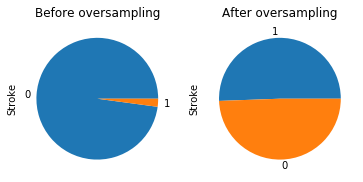

In [11]:
oversampling(y_train, X_train)

I used six models of GaussianNB, LogisticRegression, CatBoostClassifier in their basic version without oversamplin and with oversampling. We will see what differences in the minority set classification the oversampling method gives.!!

I get rid of one dimension from the ytrain_OV set so that the set is similar to y_test.

In [12]:
print(Xtrain_OV.shape)
print(ytrain_OV.shape)
ytrain_OV = ytrain_OV[target]
print(ytrain_OV.shape)

(6876, 11)
(6876, 1)
(6876,)


W poprzednim wpisie uznaliśmy, że oversampling poprawiło jakość klasyfikacji. Kolejne działania będą opierały sie na danych zbilansowanych przez oversampling. Dlatego teraz podmieniamy zwykłą próbę na próbę po oversamoling.

In [13]:
X_train = Xtrain_OV
y_train = ytrain_OV
print(X_train.shape)
print(y_train.shape)

(6876, 11)
(6876,)


<span style="font-size: 180%;color:#1155cc"> Ścieżka do modeli:
    
<span style="font-size: 110%;color:#1155cc"> oznakowanie modeli

model1 - modele na ustawieniach fabrycznych

        classifiers_A = [SVM,CBC,XGB,LGBM,KNN,NBC,LRE,RFC,GBC]
        nameA = ['SVM','CBC','XGB','LGBM','KNN','NBC','LRE','RFC','GBC']

model2 - modele na ustawieniach fabrycznych po bagging

        classifiers_B = [SVM_b,CBC_b,XGB_b,LGBM_b,KNN_b,NBC_b,LRE_b,RFC_b,GBC_b]
        nameB = ['SVM_b','CBC_b','XGB_b','LGBM_b','KNN_b','NBC_b','LRE_b','RFC_b','GBC_b']
        
model3 - modele na ustawieniach fabrycznych po kalibracji     

model4 -  modele na ustawieniach fabrycznych po bagging po kalibracji

model5 - modele po cross-validation

        classifiers_F = [gs_SVM,gs_SVM2,gs_XGB,gs_LGBM,gs_KNN,gs_NBC,gs_LRE,gs_RFC,gs_RFC2]
        nameF = ['gs_SVM','gs_SVM2','gs_XGB','gs_LGBM','gs_KNN','gs_NBC','gs_LRE','gs_RFC','gs_RFC2']
        
model6 - modele po cross-validation po bagging 

model7 - modele na ustawieniach optymalnych

In [14]:
address1 ='/home/wojciech/Pulpit/7/model1-{0}.pkl'  #<=  modele na ustawieniach fabrycznych
address2 ='/home/wojciech/Pulpit/7/model2-{0}.pkl'  #<=  modele na ustawieniach fabrycznych po bagging
address3 ='/home/wojciech/Pulpit/7/model3-{0}.pkl'  #<=  modele na ustawieniach fabrycznych po kalibracji
address4 ='/home/wojciech/Pulpit/7/model4-{0}.pkl'  #<=  modele na ustawieniach fabrycznych po bagging po kalibracji

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC 
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
import joblib
import time


### <span style="font-size: 110%;color:white;background:Red">Model 1 <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach fabrycznych
### <span style="font-size: 110%;color:white;background:Red">Model 2  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach fabrycznych po bagging 


In [16]:

NBC = GaussianNB()
LRE = LogisticRegression(solver='lbfgs')
GBC = GradientBoostingClassifier()
RFC = RandomForestClassifier()
LGBM = LGBMClassifier() 
CBC = CatBoostClassifier(verbose=0, n_estimators=100)
XGB = XGBClassifier()
LREN = LogisticRegression(solver='newton-cg')
KNN = KNeighborsClassifier(n_neighbors=1, p=2)
SVM = SVC(probability=True) 

print()
print('----Models without settings-----------------------------')
print()

classifiers_A = [SVM,CBC,XGB,LGBM,KNN,NBC,LRE,RFC,GBC]
nameA = ['SVM','CBC','XGB','LGBM','KNN','NBC','LRE','RFC','GBC']

for n,t in zip(nameA,classifiers_A):          ## Szkolenie modeli w pętli
    start_time = time.time()
    t.fit(X_train, y_train)
    filename1 =address1.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename1, compress=9)
    #email(filename1,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(blue(n),p,"---",time.ctime())


### Wzmacnianie przez bagowanie!

NBC_b = BaggingClassifier(base_estimator=NBC, n_estimators=10, max_samples=0.8, max_features=0.8)
LRE_b = BaggingClassifier(base_estimator=LRE, n_estimators=10, max_samples=0.8, max_features=0.8)
GBC_b = BaggingClassifier(base_estimator=GBC, n_estimators=10, max_samples=0.8, max_features=0.8)
RFC_b = BaggingClassifier(base_estimator=RFC, n_estimators=10, max_samples=0.8, max_features=0.8)
LGBM_b = BaggingClassifier(base_estimator=LGBM, n_estimators=10, max_samples=0.8, max_features=0.8)
CBC_b = BaggingClassifier(base_estimator=CBC, n_estimators=10, max_samples=0.8, max_features=0.8)
XGB_b = BaggingClassifier(base_estimator=XGB, n_estimators=10, max_samples=0.8, max_features=0.8)
SVM_b = BaggingClassifier(base_estimator=SVM, n_estimators=10, max_samples=0.8, max_features=0.8)
KNN_b = BaggingClassifier(base_estimator=KNN, n_estimators=10, max_samples=0.8, max_features=0.8)

nameB = ['SVM_b','CBC_b','XGB_b','LGBM_b','KNN_b','NBC_b','LRE_b','RFC_b','GBC_b']
classifiers_B = [SVM_b,CBC_b,XGB_b,LGBM_b,KNN_b,NBC_b,LRE_b,RFC_b,GBC_b]
print()
print('----Models without settings after bagging------------------')
print()
for n,t in zip(nameB,classifiers_B):
    start_time = time.time()
    #BaggingClassifier(base_estimator=t, n_estimators=10, max_samples=0.8, max_features=0.8) 
    t.fit(X_train, y_train)
    filename2 =address2.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename2, compress=9) 
    #email(filename2,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(blue(n),p,"---",time.ctime())
    


----Models without settings-----------------------------

SVM 6.1 --- Sun Nov 15 22:16:10 2020
CBC 0.5 --- Sun Nov 15 22:16:10 2020
XGB 0.5 --- Sun Nov 15 22:16:11 2020
LGBM 0.3 --- Sun Nov 15 22:16:11 2020
KNN 0.3 --- Sun Nov 15 22:16:11 2020
NBC 0.0 --- Sun Nov 15 22:16:11 2020
LRE 0.0 --- Sun Nov 15 22:16:11 2020
RFC 1.5 --- Sun Nov 15 22:16:13 2020
GBC 1.0 --- Sun Nov 15 22:16:14 2020

----Models without settings after bagging------------------

SVM_b 19.3 --- Sun Nov 15 22:16:33 2020
CBC_b 4.1 --- Sun Nov 15 22:16:37 2020
XGB_b 3.6 --- Sun Nov 15 22:16:41 2020
LGBM_b 2.5 --- Sun Nov 15 22:16:44 2020
KNN_b 3.0 --- Sun Nov 15 22:16:46 2020
NBC_b 0.1 --- Sun Nov 15 22:16:47 2020
LRE_b 0.4 --- Sun Nov 15 22:16:47 2020
RFC_b 14.4 --- Sun Nov 15 22:17:01 2020
GBC_b 5.6 --- Sun Nov 15 22:17:07 2020


### <span style="font-size: 110%;color:white;background:Red">Model 3  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach fabrycznych po kalibracji

In [17]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

SVM_c = CalibratedClassifierCV(SVM, method='sigmoid', cv=5)
CBC_c = CalibratedClassifierCV(CBC, method='sigmoid', cv=5)
XGB_c = CalibratedClassifierCV(XGB, method='sigmoid', cv=5)
LGBM_c = CalibratedClassifierCV(LGBM, method='sigmoid', cv=5)
KNN_c = CalibratedClassifierCV(KNN, method='sigmoid', cv=5)
NBC_c = CalibratedClassifierCV(NBC, method='sigmoid', cv=5)
LRE_c = CalibratedClassifierCV(LRE, method='sigmoid', cv=5)
RFC_c = CalibratedClassifierCV(RFC, method='sigmoid', cv=5)
GBC_c = CalibratedClassifierCV(GBC, method='sigmoid', cv=5)

classifiers_3 = [SVM_c,CBC_c,XGB_c,LGBM_c,KNN_c,NBC_c,LRE_c,RFC_c,GBC_c]
name3 = ['SVM_c','CBC_c','XGB_c','LGBM_c','KNN_c','NBC_c','LRE_c','RFC_c','GBC_c']

for n,t in zip(name3,classifiers_3):
    start_time = time.time()
    t.fit(X_train, y_train)
    filename3 =address3.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename3, compress=9)
    # email(filename3,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(green(n),p,"---",time.ctime())

SVM_c 20.0 --- Sun Nov 15 22:17:27 2020
CBC_c 2.5 --- Sun Nov 15 22:17:29 2020
XGB_c 1.7 --- Sun Nov 15 22:17:31 2020
LGBM_c 1.3 --- Sun Nov 15 22:17:32 2020
KNN_c 1.5 --- Sun Nov 15 22:17:34 2020
NBC_c 0.1 --- Sun Nov 15 22:17:34 2020
LRE_c 0.2 --- Sun Nov 15 22:17:34 2020
RFC_c 8.3 --- Sun Nov 15 22:17:42 2020
GBC_c 4.4 --- Sun Nov 15 22:17:47 2020


### <span style="font-size: 110%;color:white;background:Red">Model 4  <span style="font-size: 110%;color:#6fa8dc;background:#cfe2f3">  Modele na ustawieniach fabrycznych po bagging i po kalibracji

In [18]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

SVM_d = CalibratedClassifierCV(SVM_c, method='sigmoid', cv=5)
CBC_d = CalibratedClassifierCV(CBC_c, method='sigmoid', cv=5)
XGB_d = CalibratedClassifierCV(XGB_c, method='sigmoid', cv=5)
LGBM_d = CalibratedClassifierCV(LGBM_c, method='sigmoid', cv=5)
KNN_d = CalibratedClassifierCV(KNN_c, method='sigmoid', cv=5)
NBC_d = CalibratedClassifierCV(NBC_c, method='sigmoid', cv=5)
LRE_d = CalibratedClassifierCV(LRE_c, method='sigmoid', cv=5)
RFC_d = CalibratedClassifierCV(RFC_c, method='sigmoid', cv=5)
GBC_d = CalibratedClassifierCV(GBC_c, method='sigmoid', cv=5)

classifiers_4 = [SVM_d,CBC_d,XGB_d,LGBM_d,KNN_d,NBC_d,LRE_d,RFC_d,GBC_d]
name4 = ['SVM_d','CBC_d','XGB_d','LGBM_d','KNN_d','NBC_d','LRE_d','RFC_d','GBC_d']

for n,t in zip(name4,classifiers_4):
    start_time = time.time()
    t.fit(X_train, y_train)
    filename4 =address4.format(n)  #<= zapisujemy model na dysku
    _ = joblib.dump(t, filename4, compress=9)
    #email(filename4,n)
    p = np.round((time.time() - start_time),decimals=1)
    print(green(n),p,"---",time.ctime())

SVM_d 66.9 --- Sun Nov 15 22:18:54 2020
CBC_d 10.3 --- Sun Nov 15 22:19:04 2020
XGB_d 7.2 --- Sun Nov 15 22:19:11 2020
LGBM_d 5.7 --- Sun Nov 15 22:19:17 2020
KNN_d 6.3 --- Sun Nov 15 22:19:23 2020
NBC_d 0.3 --- Sun Nov 15 22:19:24 2020
LRE_d 1.0 --- Sun Nov 15 22:19:25 2020
RFC_d 39.4 --- Sun Nov 15 22:20:04 2020
GBC_d 18.0 --- Sun Nov 15 22:20:22 2020


<span style="font-size: 110%;color:#1155cc">To pierwsza część której zadanie jest zbadanie który rodzaj modelu najbardziej rokuje. Ta część jest robiona na małej próbie. Następna część WALIDACJA jest robiona na pełnej próbie dlatego zczytuje modele z dysku.

<span style="font-size: 120%;color:RED"> CAŁA MASZYNA, WSZYSTKIE CZĘŚCI, NIE MOŻE DŁUŻEJ SIĘ WYLICZAĆ NIŻ 30 MINUT  